In [3]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt 
from datetime import date
from datetime import datetime as dt
import quandl
import yfinance as yf
import math
from Backtest import Order, Orders, Portfolio, Backtest
from Strategies import MACross

In [6]:
macross = MACross(100, 'BRLL', date(2018,1,5), date(2020,2,13))
macross.generateOrders(8,21)

TypeError: __init__() takes 2 positional arguments but 4 were given

Loading tickers...
1 / 2
2 / 2
Starting Cash: 100
---------- RESULTS -----------
Final Cash: $ 0
Final Value: $ 165.71
Total Return: 65.71 %
Annualized Return: 1.18 %
Holdings: {'BRLL': 285.7142905799711}


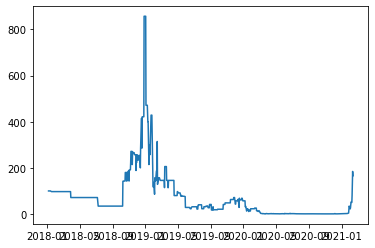

In [2]:
orders = Orders()
orders.add(Order(date(2018,1,5),'BRLL','buy',0,100))
#orders.add(Order(date(2006,1,3),'SPY','sell',0,200))
#orders.add(Order(date(2007,1,3),'SPY','sell',0,300))

backtest = Backtest(100)
backtest.simulate(orders)
backtest.plotPortfolioValue()


In [20]:
orders = Orders()
orders.add(Order(date(2005,1,3),'SPY','buy',0,50))
orders.add(Order(date(2008,1,3),'SPY','sell',0,100))
orders.add(Order(date(2009,1,5),'SPY','buy',0,100))

backtest = Backtest(200)

#backtest.plotIndividualStock("SPY")

backtest.simulate(orders)
backtest.plotPortfolioValue()

Loading tickers...
                  MSFT       AAPL         SPY       CM.TO      TD.TO  \
2018-01-05   84.530701  42.101261  258.509186  105.439400  65.475533   
2018-01-08   84.616966  41.944889  258.981873  105.014214  65.326935   
2018-01-09   84.559456  41.940075  259.568054  104.963173  65.150681   
2018-01-10   84.176056  41.930458  259.170959  104.682564  65.185944   
2018-01-11   84.425262  42.168621  261.061890  104.589012  64.912750   
...                ...        ...         ...         ...        ...   
2019-11-05  142.460953  63.541344  299.926788  106.066101  71.486687   
2019-11-06  142.066467  63.568520  299.995148  106.502319  71.788116   
2019-11-07  142.263687  64.302185  301.050171  106.715790  71.910568   
2019-11-08  143.940186  64.478165  301.792633  106.715790  72.108391   
2019-11-11  144.088089  64.988770  301.216278  106.298119  72.240273   

                AC.TO     ABX.TO    ATWT    BRLL  
2018-01-05  24.680000  18.049063  0.0045  0.3500  
2018-01-08  23

TypeError: plotPortfolioValue() takes 1 positional argument but 2 were given

             Adj Close  Return  LastReturn
2005-01-03   87.421600     NaN         NaN
2005-01-04   86.353340     NaN         NaN
2005-01-05   85.757454     NaN         NaN
2005-01-06   86.193451     NaN         NaN
2005-01-07   86.069946     NaN         NaN
...                ...     ...         ...
2019-11-05  299.926788     NaN         NaN
2019-11-06  299.995148     NaN         NaN
2019-11-07  301.050171     NaN         NaN
2019-11-08  301.792633     NaN         NaN
2019-11-11  301.216278     NaN         NaN

[3741 rows x 3 columns]
Coefficients: 
 [[-0.08901632]]
Mean squared error: 0.00
[[ 0.00437209]
 [-0.00274003]
 [-0.00288534]
 ...
 [ 0.00022787]
 [ 0.00350448]
 [ 0.00246017]]
[[-2.90208010e-04]
 [ 3.42886094e-04]
 [ 3.55821480e-04]
 ...
 [ 7.86950566e-05]
 [-2.12976541e-04]
 [-1.20016521e-04]]


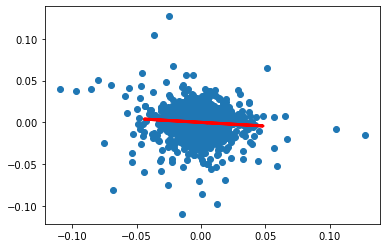

In [51]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


ticker = 'SPY'

start_date = date(2005,1,1)
end_date = date(2019,11,11)

priceTable = pd.DataFrame()

priceTable = priceTable.reindex(columns = ['Adj Close', 'Return', 'LastReturn'])

priceTable['Adj Close'] = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)['Adj Close']
print(priceTable)

for i in range(1,priceTable.shape[0]):
    val = (priceTable.iloc[i]['Adj Close'] - priceTable.iloc[i-1]['Adj Close'])/priceTable.iloc[i]['Adj Close']
    priceTable[i:i+1]['Return'] = val
    priceTable[i+1:i+2]['LastReturn'] = val

priceTable = priceTable.loc[priceTable.index.date > date(2005,1,5)]

plt.scatter(x=priceTable['LastReturn'],y=priceTable['Return'])

priceTableTrain = priceTable.loc[priceTable.index.date < date(2013,1,5)]
priceTableTest = priceTable.loc[priceTable.index.date > date(2013,1,5)]

regr = linear_model.LinearRegression()

xtrain = priceTableTrain['LastReturn'].to_numpy().reshape(-1,1)
ytrain = priceTableTrain['Return'].to_numpy().reshape(-1,1)
xtest = priceTableTest['LastReturn'].to_numpy().reshape(-1,1)
ytest = priceTableTest['Return'].to_numpy().reshape(-1,1)

regr.fit(xtrain,ytrain)

predict = regr.predict(xtest)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error - not working
print('Mean squared error: %.2f'
      % mean_squared_error(priceTableTest['Return'], predict))


print(xtest)
print(predict)
plt.plot(xtest,predict,color='red',linewidth=3)



              BRLL  8 Day MA  21 Day MA  50 Day MA
2018-01-05  0.3500       NaN        NaN        NaN
2018-01-08  0.3500       NaN        NaN        NaN
2018-01-09  0.3500       NaN        NaN        NaN
2018-01-10  0.3500       NaN        NaN        NaN
2018-01-11  0.3500       NaN        NaN        NaN
...            ...       ...        ...        ...
2021-02-08  0.1752  0.117419   0.049117   0.022522
2021-02-09  0.2850  0.145481   0.062498   0.028186
2021-02-10  0.4930  0.192106   0.085750   0.038010
2021-02-11  0.6460  0.261231   0.116288   0.050894
2021-02-12  0.5800  0.324000   0.143669   0.062452

[781 rows x 4 columns]


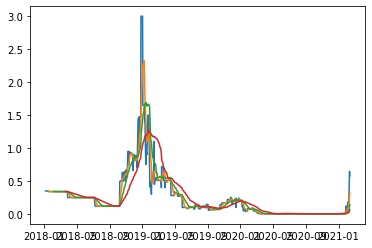

Loading tickers...
1 / 2
2 / 2
               ATWT    BRLL
2018-01-05  0.00450  0.3500
2018-01-08  0.00450  0.3500
2018-01-09  0.00450  0.3500
2018-01-10  0.00450  0.3500
2018-01-11  0.00450  0.3500
...             ...     ...
2021-02-08  0.06775  0.1752
2021-02-09  0.06500  0.2850
2021-02-10  0.07000  0.4930
2021-02-11  0.06950  0.6460
2021-02-12  0.06800  0.5800

[781 rows x 2 columns]
Starting Cash: 100
           totalVal
2018-01-05      100
2018-01-08      100
2018-01-09      100
2018-01-10      100
2018-01-11      100
...             ...
2021-02-08      100
2021-02-09      100
2021-02-10      100
2021-02-11      100
2021-02-12      100

[781 rows x 1 columns]
---------- RESULTS -----------
Final Cash: $ 100
Final Value: $ 100
Total Return: 0.0 %
Annualized Return: 1.0 %
Holdings: {}


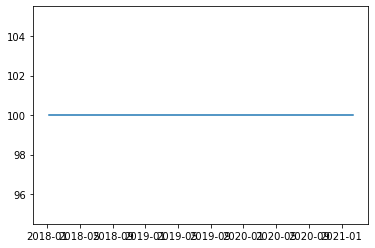

In [44]:
# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
ticker = 'BRLL'

# We can get data by our choice by giving days bracket
start_date = date(2018,1,5)
end_date = date(2021,2,13)

priceTable = pd.DataFrame()

priceTable[ticker] = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)['Adj Close']

maList = [8,21,50]
maNameList = []

for ma in maList:
    colName = str(ma) + " Day MA"
    maNameList.append(colName)
    priceTable[colName] = np.nan
    priceTable[colName] = priceTable.rolling(window=ma).mean()


print(priceTable)

last50Val = 0
last200Val = 0

orders = Orders()

lastAction = "Sell"

delay1 = 8
delay2 = 21

        
sellList = []
buyList = []

for i in range(priceTable.shape[0]):
    if(i >= (delay2 + 1)):
        currentDate = priceTable.iloc[i].name.date()
        if(movingAvg50 > movingAvg200 and last50Val < last200Val and lastAction != "Buy"):
            #print("Buy",currentDate)
            orders.add(Order(currentDate,ticker,'buy',0,0))
            buyList.append(currentDate)
            lastAction = "Buy"
        if(movingAvg50 < movingAvg200 and last50Val > last200Val and lastAction != "Sell"):
            #print("Sell",currentDate)
            orders.add(Order(currentDate,ticker,'sell',0,0))
            sellList.append(currentDate)
            lastAction = "Sell"

        last200Val = movingAvg200
        last50Val = movingAvg50

priceTable


plt.plot(priceTable)

for xc in buyList:
    plt.axvline(x=xc, color='r', linestyle='--')

for xc in sellList:
    plt.axvline(x=xc, color='b', linestyle='--')

plt.show()


backtest = Backtest(100)
backtest.simulate(orders)
backtest.plotPortfolioValue()


Loading tickers...
0 / 3
1 / 3
2 / 3
Starting Cash: 0


ZeroDivisionError: division by zero